In [43]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

C:\Users\User\AppData\Local\Temp\ipykernel_14360\3700766821.py:2: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('reset -sf')


In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPRegressor
import cv2
from PIL import Image
plt.style.use('ggplot')

In [45]:
def fun1(reward, option, trips = 100):
    if option == 0:
        return 0.0000947*reward + trips*0.7505851
    if option == 1:
        return 0.0000119*reward + trips*0.0001775
    if option == 2:
        return 0.04789*reward + trips*1.45328

In [46]:
def fun2(reward, option, trips = 100):
    if option == 0:
        return 0.0000733*reward + trips*0.4792257
    if option == 1:
        return 0.0000108*reward + trips*0.0001358

In [52]:
def fun3(reward, option, trips = 100):
    if option == 0:
        return  0.0000441*reward + trips*-0.1263933
    if option == 1:
        return  0.0000246*reward + trips*-0.3247766

In [63]:
def fun4(reward, option, trips = 100):
    if option == 0:
        return 0.0000231*reward + trips*-0.0648125
    if option == 1:
        return 0.00000953*reward + trips*-0.2030365

In [47]:
data = pd.read_excel('Data_CO.xlsx', sheet_name="BASE")
data

,Year week,TRM,SUs Referral,Regulars Referral,DFTs Referral,Total DFTs,DgD DFTs Contribution %,Reward,Reward (USD),Trips,...,Weekly burn (Local),Weekly burn (USD),Weekly DAC (USD),Week,DFTs,Organic.1,Paid.1,Others,Unnamed: 34,BAQ
0,202251,4752,185,NaN,138,691,0.200,200000,42,70,...,59650000,12.6K,91,202151,164,0,0,553,NaN,0
1,202250,4799,241,NaN,215,796,0.270,300000,63,70,...,439400000,91.6K,426,202150,305,0,0,581,NaN,0
2,202249,4823,457,NaN,388,1013,0.383,1250000,259,150,...,543500000,112.7K,290,202149,302,0,0,625,NaN,0
3,202248,4796,804,NaN,610,1236,0.494,2500000,521,230,...,454700000,94.8K,155,202148,302,0,0,626,NaN,0
4,202247,4891,710,NaN,552,1336,0.413,2000000,409,210,...,355400000,72.7K,132,202147,290,0,0,784,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,202205,3946,11,NaN,4,27,0.148,500000,127,25,...,2460000,.6K,156,202105,1,15,7,0,45455.0,1
251,202204,3959,18,NaN,9,39,0.231,500000,126,25,...,500000,.1K,14,202104,3,15,10,0,27778.0,1
252,202203,3983,15,NaN,5,33,0.152,480000,120,35,...,300000,.1K,15,202103,4,15,9,0,32000.0,1
253,202202,4002,8,NaN,2,21,0.095,480000,120,40,...,300000,.1K,37,202102,9,10,4,0,60000.0,1


In [ ]:
data.sort_values(by=['SUs Referral'], ascending=False)

In [48]:
data.sort_values(by=['DFTs Referral'], ascending=False)

,Year week,TRM,SUs Referral,Regulars Referral,DFTs Referral,Total DFTs,DgD DFTs Contribution %,Reward,Reward (USD),Trips,...,Weekly burn (Local),Weekly burn (USD),Weekly DAC (USD),Week,DFTs,Organic.1,Paid.1,Others,Unnamed: 34,BAQ
3,202248,4796,804,NaN,610,1236,0.494,2500000,521,230,...,454700000,94.8K,155,202148,302,0,0,626,NaN,0
5,202246,4937,816,NaN,598,1493,0.401,2000000,405,210,...,247525000,50.1K,84,202146,279,0,0,895,NaN,0
6,202245,4874,780,NaN,565,1522,0.371,1800000,369,200,...,212425000,43.6K,77,202145,283,0,0,957,NaN,0
4,202247,4891,710,NaN,552,1336,0.413,2000000,409,210,...,355400000,72.7K,132,202147,290,0,0,784,NaN,0
21,202230,4370,563,NaN,435,1070,0.407,1500000,343,160,...,156600000,35.8K,82,202130,138,274,304,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,202211,3820,12,NaN,3,34,0.088,750000,196,60,...,2000000,.5K,175,202111,4,18,9,0,62500.0,1
232,202223,3856,13,NaN,2,25,0.080,800000,207,90,...,5600000,1.5K,726,202123,2,13,9,0,61538.0,1
205,202250,4799,13,NaN,2,45,0.044,300000,63,70,...,2300000,.5K,240,202150,4,0,0,43,23077.0,1
253,202202,4002,8,NaN,2,21,0.095,480000,120,40,...,300000,.1K,37,202102,9,10,4,0,60000.0,1


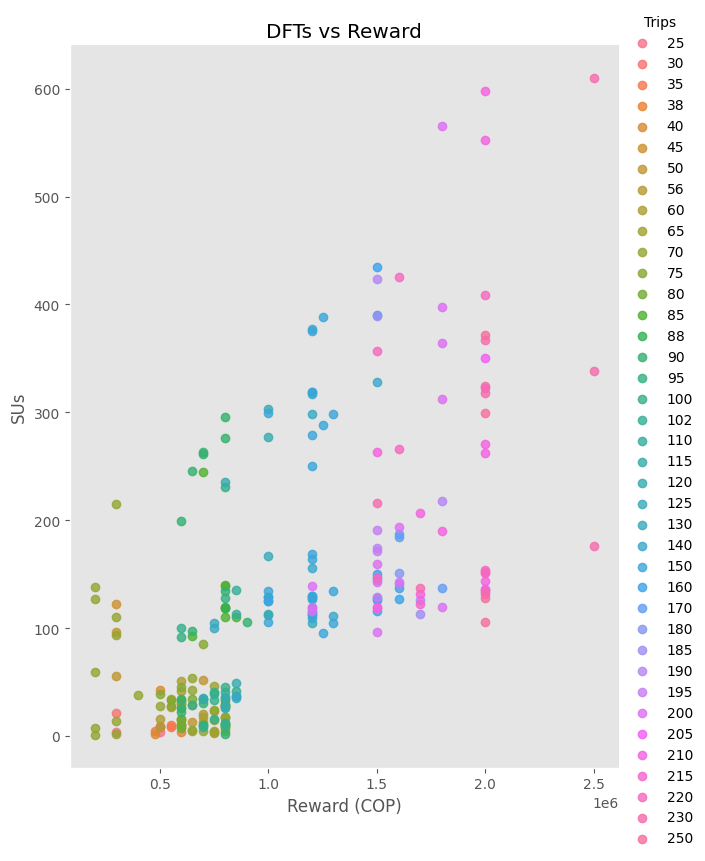

In [65]:
# 
# se toma como tercera variable la calidad
sns.lmplot(x='Reward', 
           y='DFTs Referral', 
           height=8,
           aspect=.8,
           data=data, 
           fit_reg=False, 
           hue='Trips', 
           legend=True)

plt.ylabel('SUs')
plt.xlabel('Reward (COP)')
plt.title('DFTs vs Reward')
plt.grid()
plt.show()

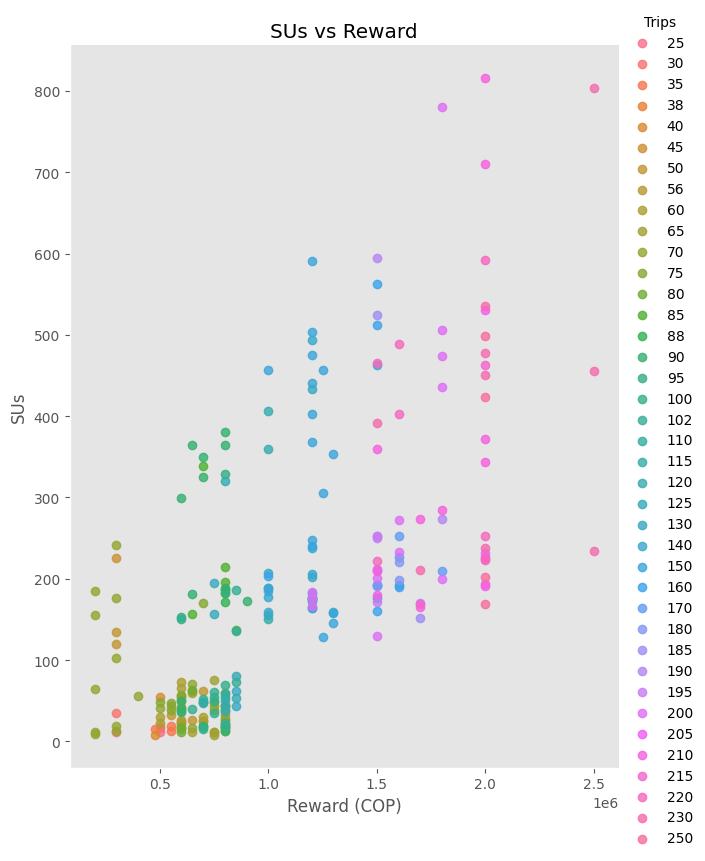

In [66]:
# 
# se toma como tercera variable la calidad
sns.lmplot(x='Reward', 
           y='SUs Referral', 
           height=8,
           aspect=.8,
           data=data, 
           fit_reg=False, 
           hue='Trips', 
           legend=True)

plt.ylabel('SUs')
plt.xlabel('Reward (COP)')
plt.title('SUs vs Reward')
plt.grid()
plt.show()

In [ ]:
rew = np.linspace(50000, 2500000, 1000)
plt.scatter(data['Reward'], data['SUs Referral'])
plt.plot(rew, fun1(rew, 0), color = 'blue')
plt.plot(rew, fun1(rew, 1), color = 'purple', linestyle='dashdot')
#plt.plot(rew, fun1(rew, 2), color = 'yellow',linestyle='dashdot')
plt.ylabel('SUs')
plt.xlabel('Reward (COP)')
plt.title('SUs vs Reward')
plt.legend(['Datos','Modelo', 'Min'])
plt.show()

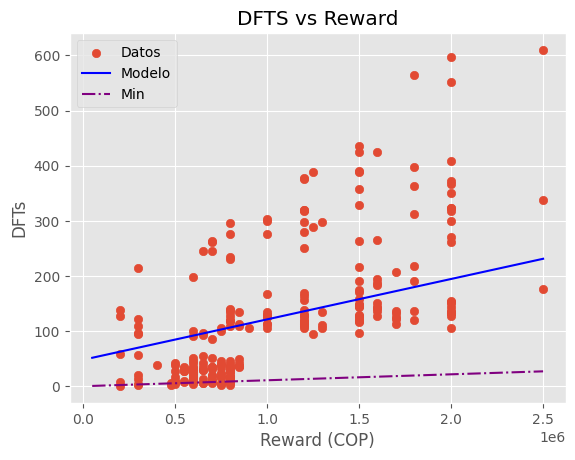

In [50]:
rew = np.linspace(50000, 2500000, 1000)
plt.scatter(data['Reward'], data['DFTs Referral'])
plt.plot(rew, fun2(rew, 0), color = 'blue')
plt.plot(rew, fun2(rew, 1), color = 'purple', linestyle='dashdot')
plt.ylabel('DFTs')
plt.xlabel('Reward (COP)')
plt.title('DFTS vs Reward')
plt.legend(['Datos','Modelo', 'Min'])
plt.show()

In [51]:
BAQ = pd.read_excel('Data_CO.xlsx', sheet_name="BAQ")
BAQ

,Year week,TRM,SUs Referral,Regulars Referral,DFTs Referral,Total DFTs,DgD DFTs Contribution %,Reward,Reward (USD),Trips,...,Weekly burn (USD),Weekly DAC (USD),Week,DFTs,Organic.1,Paid.1,Others,Unnamed: 34,BAQ,Relaunch
0,202248,4796,15,NaN,8,38,0.211,700000,146,100,...,1.0K,125,202148,1,0,0,30,46667,1,0
1,202247,4891,19,NaN,12,47,0.255,800000,164,100,...,.6K,51,202147,5,0,0,35,42105,1,0
2,202246,4937,23,NaN,10,50,0.200,800000,162,100,...,.1K,14,202146,2,0,0,40,34783,1,0
3,202245,4874,19,NaN,10,66,0.152,700000,144,90,...,.5K,53,202145,5,0,0,56,36842,1,0
4,202244,5012,18,NaN,10,40,0.250,700000,140,90,...,.4K,38,202144,3,0,0,30,38889,1,0
5,202243,4879,16,NaN,15,47,0.319,600000,123,80,...,.6K,41,202143,5,0,0,32,37500,1,0
6,202242,4846,12,NaN,10,53,0.189,600000,124,80,...,.1K,12,202142,1,0,0,43,50000,1,0
7,202241,4642,18,NaN,7,41,0.171,600000,129,80,...,.5K,65,202141,3,0,0,34,33333,1,0
8,202240,4576,23,NaN,8,81,0.099,500000,109,60,...,1.7K,219,202140,2,0,0,73,21739,1,0
9,202239,4565,27,NaN,18,49,0.367,800000,175,70,...,1.1K,58,202139,2,0,0,31,29630,1,0


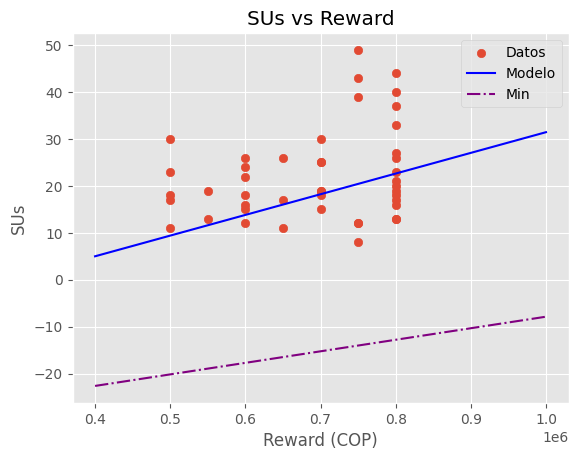

In [58]:
rew = np.linspace(400000, 1000000, 1000)
plt.scatter(BAQ['Reward'], BAQ['SUs Referral'])
plt.plot(rew, fun3(rew, 0), color = 'blue')
plt.plot(rew, fun3(rew, 1), color = 'purple', linestyle='dashdot')
#plt.plot(rew, fun1(rew, 2), color = 'yellow',linestyle='dashdot')
plt.ylabel('SUs')
plt.xlabel('Reward (COP)')
plt.title('SUs vs Reward')
plt.legend(['Datos','Modelo', 'Min'])
plt.show()

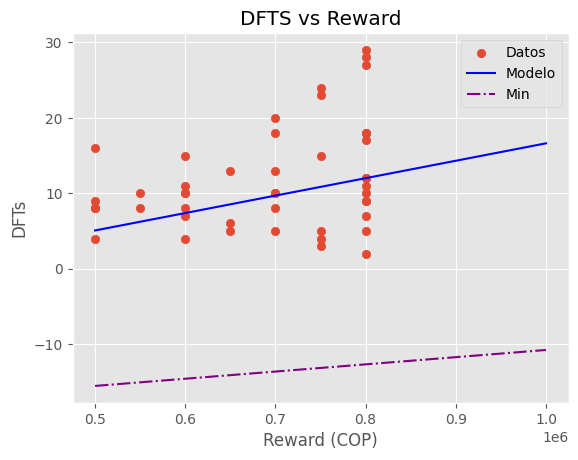

In [64]:
rew = np.linspace(500000, 1000000, 1000)
plt.scatter(BAQ['Reward'], BAQ['DFTs Referral'])
plt.plot(rew, fun4(rew, 0), color = 'blue')
plt.plot(rew, fun4(rew, 1), color = 'purple', linestyle='dashdot')
plt.ylabel('DFTs')
plt.xlabel('Reward (COP)')
plt.title('DFTS vs Reward')
plt.legend(['Datos','Modelo', 'Min'])
plt.show()